# **Introducción a la Ciencia de los Datos**


# **Análisis de Factores Socioeconómicos en el desempeño estudiantil de las Pruebas SABER 11°  (2022-II) en la Región Caribe Colombiana.**

*Jose Daniel Quintana Fuentes*


# **Introducción**

La base de datos seleccionada para este análisis corresponde a los resultados de las pruebas Saber 11, una evaluación estandarizada realizada semestralmente por el ICFES en Colombia. El propósito principal de estas pruebas es servir como criterio para la admisión de estudiantes en instituciones de educación superior, monitorear la calidad de la formación en establecimientos de educación media y proporcionar información para la estimación del valor agregado de la educación superior.

Es importante destacar que se ha seleccionado para este análisis el período 2022-2, lo que permite hacer énfasis en datos específicos de dicho período y realizar un análisis más relevante y actualizado.

En cuanto a la composición de la base de datos, los datos se encuentran estructurados en forma de tablas con numerosas columnas que representan diferentes aspectos de la evaluación. Los archivos originales estaban en formato .txt, con campos separados por "¬", lo cual requería una transformación para convertirlos en un formato .csv, para su lectura y análisis. Esta transformación implicó cambiar el separador de campos de "¬" a comas (",") para facilitar la manipulación de los datos.

Las variables presentes en la base de datos pueden clasificarse de la siguiente manera:


*   Variables cuantitativas discretas: Estas variables representan datos numéricos que son contables y no continuos. Ejemplos de estas variables pueden ser las puntuaciones obtenidas en las diferentes áreas de la prueba.
*   Variables cualitativas nominales: Estas variables representan categorías o etiquetas sin un orden específico. Por ejemplo, la variable que indica el género del estudiante es una variable cualitativa nominal, ya que las categorías (por ejemplo, "Masculino" o "Femenino") no tienen un orden inherente.
*   Variables cualitativas ordinales: Estas variables también representan categorías, pero tienen un orden específico. Por ejemplo, una variable que indique el nivel de educación de los padres (por ejemplo, "Primaria", "Secundaria", "Educación profesional", etc…) es una variable cualitativa ordinal, ya que las categorías tienen un orden lógico.

Esta base de datos es una fuente de datos estructurados que contiene información sobre los resultados de las pruebas estandarizadas en Colombia. Las variables en la base de datos son una combinación de cuantitativas discretas, cualitativas nominales y cualitativas ordinales, y se han transformado en un formato .csv para su análisis en el contexto de Introducción a la Ciencia de los Datos.

In [ ]:
# Permitir el acceso de Colab a los documentos almacenados en Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Librerias Necesarias:

*   **Pandas** y **Numpy** para la manipulacion de datos.
*   **Seaborn** y **Matplotlib** para la visulacion de los datos.

Nota: a lo largo del código se importarán librerias adicionales


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

El objetivo del presente trabajo es analizar el impacto de los factores socioeducativos en el desempeño estudiantil en las Pruebas SABER 11° (2022-II) para las regiones Caribe y Eje Cafetero de Colombia.

# Calidad de los datos

In [ ]:
# Haciendo uso de read_csv se carga un archivo separado por comas (CSV) como un
# DataFrame (tipo de objeto pandas).
# Con los métodos .head(n) .tail(n) y .sample(n) se examinan las primeras n,
# últimas n y n muestras aleatorias, respectivamente

df = pd.read_csv('/content/drive/My Drive/Maestria/Proyecto_CienciaDeDatos/DatosCsv/SABER11.csv')

## Función para obtener información de las variables de la base de datos

La siguiente función permite obtener información de:

- Número de registros (Filas).
- Número de variables (Columnas).
- Número de valores faltantes por características.
- Posibles valores de la variable.

In [ ]:
# Función para mostrar información sobre la base de datos

def informacionBaseDeDatos(data):

  num_filas, num_columnas = data.shape
  print("Filas   :",num_filas)
  print("Columnas:",num_columnas)
  print("%30s ! %10s  !  PosiblesValores"%("Caracteristica","Faltantes"))

  # Obtener una lista con etiquetas de las características
  columnas = data.columns

  # Obtener una lista con la cantidad de valores nulos en cada característica
  faltantes = data.isnull().sum()

  for i in range(len(columnas)):
    # Característica [i]
    columna = columnas[i]

    # Valores posibles de las características
    posibles = data[columna].unique()


    print("%30s ! %10s  !  "%(columna,faltantes[i]),end="")
    print(list(posibles))

In [ ]:
informacionBaseDeDatos(df)

Filas   : 532792
Columnas: 81
                Caracteristica !  Faltantes  !  PosiblesValores
            ESTU_TIPODOCUMENTO !          0  !  ['CC', 'TI', 'CR', 'PEP', 'NES', 'CE', 'PPT', 'PE', 'PC', 'PTP', 'PET', 'RC', 'PPT ']
             ESTU_NACIONALIDAD !          0  !  ['COLOMBIA', 'VENEZUELA', 'BRASIL', 'ECUADOR', 'ESPAÑA', 'ARUBA', 'ITALIA', 'VANUATU', 'PANAMÁ', 'ESTADOS UNIDOS', 'CUBA', 'PERÚ', 'JAPÓN', 'COREA DEL SUR', 'FRANCIA', 'VIETNAM', 'COSTA RICA', 'CURAZAO', 'HONDURAS', 'CHINA', 'ARGELIA', 'AUSTRIA', 'REPÚBLICA DOMINICANA', 'MÉXICO', 'GUATEMALA', 'BOLIVIA', 'ARGENTINA', 'CHILE', 'URUGUAY', 'WALLIS Y FUTUNA', 'TURQUÍA', 'PORTUGAL', 'ALEMANIA', 'EL SALVADOR', 'CABO VERDE', 'PUERTO RICO', 'COREA DEL NORTE', 'NICARAGUA', 'PAÍSES BAJOS - HOLANDA', 'REINO UNIDO', 'SUIZA', 'BÉLGICA', 'LETONIA', 'SENEGAL', 'JORDANIA']
                   ESTU_GENERO !          4  !  ['M', 'F', nan]
          ESTU_FECHANACIMIENTO !         81  !  ['10/12/2000', '06/12/2001', '09/08/1976', '14/06

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



          FAMI_ESTRATOVIVIENDA !      35914  !  [nan, 'Sin Estrato', 'Estrato 1', 'Estrato 2', 'Estrato 4', 'Estrato 3', 'Estrato 6', 'Estrato 5']
            FAMI_PERSONASHOGAR !      22884  !  [nan, '9 o más', '3 a 4', '5 a 6', '1 a 2', '7 a 8']
             FAMI_CUARTOSHOGAR !      23730  !  [nan, 'Dos', 'Uno', 'Tres', 'Cuatro', 'Seis o mas', 'Cinco']
            FAMI_TIENEINTERNET !      31656  !  [nan, 'Si', 'No']
          FAMI_TIENECOMPUTADOR !      23567  !  [nan, 'No', 'Si']
            FAMI_TIENELAVADORA !      23639  !  [nan, 'No', 'Si']
      FAMI_TIENEHORNOMICROOGAS !      24186  !  [nan, 'No', 'Si']
          FAMI_TIENESERVICIOTV !      32580  !  [nan, 'Si', 'No']
           FAMI_TIENEAUTOMOVIL !      24583  !  [nan, 'No', 'Si']
         FAMI_TIENEMOTOCICLETA !      23676  !  [nan, 'Si', 'No']
  FAMI_TIENECONSOLAVIDEOJUEGOS !      24633  !  [nan, 'Si', 'No']
                FAMI_NUMLIBROS !      46225  !  [nan, '0 A 10 LIBROS', '26 A 100 LIBROS', '11 A 25 LIBROS', 'MÁS DE

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Al evaluar la calidad de los datos mediante inspección visual, se consideró realizar una limpieza extra. Por tanto, se procede a borrar las variables que no aportan información relevante al análisis del taller, o cuya información se puede obtener de otras variables.

Por ejemplo, las variables "Código del Departamento" y "Nombre del Departamento" son redundantes porque expresan la misma información. En consecuencia, se elimina la primera.

In [ ]:
# Eliminar todas las características de la base de datos contenidas en una lista

def borrarCaracteristicas(data,lstCaracterisitcas):
  for c in lstCaracterisitcas:
    # Eliminación de la columna [c]
    data.drop(c,axis=1,inplace = True)

Haciendo uso de la función "borrarCaracteristicas", se excluyen las características menos relevantes de la base de datos.

In [ ]:
# Eliminación de características que no tienen relevancia

caracteristicas_eliminar = [
    'ESTU_TIPODOCUMENTO',
    'PERIODO',
    'ESTU_CONSECUTIVO',
    'ESTU_ESTUDIANTE',
    'ESTU_COD_RESIDE_DEPTO',
    'ESTU_COD_RESIDE_MCPIO',
    'FAMI_COMELECHEDERIVADOS',
    'FAMI_COMECEREALFRUTOSLEGUMBRE',
    'FAMI_TRABAJOLABORPADRE',
    'FAMI_TRABAJOLABORMADRE',
    'COLE_COD_DANE_ESTABLECIMIENTO',
    'COLE_CODIGO_ICFES',
    'COLE_NOMBRE_ESTABLECIMIENTO',
    'COLE_GENERO',
    'COLE_CALENDARIO',
    'COLE_COD_DANE_SEDE',
    'COLE_NOMBRE_SEDE',
    'COLE_SEDE_PRINCIPAL',
    'COLE_COD_MCPIO_UBICACION',
    'COLE_MCPIO_UBICACION',
    'COLE_COD_DEPTO_UBICACION',
    'COLE_DEPTO_UBICACION',
    'ESTU_PRIVADO_LIBERTAD',
    'ESTU_COD_MCPIO_PRESENTACION',
    'ESTU_MCPIO_PRESENTACION',
    'ESTU_DEPTO_PRESENTACION',
    'ESTU_COD_DEPTO_PRESENTACION',
    'DESEMP_MATEMATICAS',
    'PERCENTIL_MATEMATICAS',
    'DESEMP_INGLES',
    'PERCENTIL_INGLES',
    'DESEMP_C_NATURALES',
    'PERCENTIL_C_NATURALES',
    'DESEMP_LECTURA_CRITICA',
    'PERCENTIL_LECTURA_CRITICA',
    'DESEMP_SOCIALES_CIUDADANAS',
    'PERCENTIL_SOCIALES_CIUDADANAS',
    'PERCENTIL_GLOBAL',
    'PERCENTIL_ESPECIAL_GLOBAL',
    'ESTU_INSE_INDIVIDUAL',
    'ESTU_NSE_INDIVIDUAL',
    'ESTU_NSE_ESTABLECIMIENTO',
    'ESTU_ESTADOINVESTIGACION'
]

borrarCaracteristicas(df,caracteristicas_eliminar)

Debido a que el presente análisis presenta un enfoque en la Eegión Caribe, se tomaron solamente los datos de los estudiantes pertenecientes a estos departamentos y que, adicionalmente, cuentan con nacionalidad colombiana.

In [ ]:
###  Filtrado por pais  ###
df = df[df['ESTU_NACIONALIDAD'] == 'COLOMBIA']



###  Filtrado por departamentos  ###

# Lista de los departamentos
departamentos_filtrado = ['ATLANTICO', 'BOLIVAR',\
                          'MAGDALENA', 'LA GUAJIRA',\
                          'CESAR', 'CORDOBA', 'SUCRE']
# Filtrar el DataFrame para filtrar solo los departamentos de la lista
df = df[df['ESTU_DEPTO_RESIDE'].isin(departamentos_filtrado)]


El formato de la "Fecha de Nacimiento" fue modificado debido a que, para el análisis, es de interés solamente el año de nacimiento con el cual se indica la edad del estudiante. El mes y el día de esta fecha se removieron.

Adicionalmente se filtró la característica "Fecha de Nacimiento", ya que de la presencia de valores mínimos (2) y máximos (2022) incoherentes se puede suponer que existen más valores incoherentes.

Se tomó este rango (2000 - 2008) para el filtrado debido a que, con base en la media (2004) y la moda (2005), es donde se encuentran la mayor cantidad de estudiantes que presentaron la prueba en el 2022 - II.



In [ ]:
# Obtención de la año de nacimiento de la columna 'ESTU_FECHANACIMINETO'
df['ESTU_FECHANACIMIENTO']= df['ESTU_FECHANACIMIENTO'].str.split('/').str[2].astype(int)

# Eliminación de los registros con valores atipicos para esta columna
df = df[(df['ESTU_FECHANACIMIENTO']>=2000) & (df['ESTU_FECHANACIMIENTO']<2008)]

In [ ]:
df.describe()

,ESTU_FECHANACIMIENTO,PUNT_MATEMATICAS,PUNT_INGLES,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_SOCIALES_CIUDADANAS,PUNT_GLOBAL
count,127787.000000,127787.000000,127339.000000,127787.000000,127787.000000,127787.000000,127787.000000
mean,2004.749701,47.511218,46.609680,46.879730,50.283636,44.795496,236.541448
std,1.152292,12.102062,12.584605,10.195451,10.823540,11.738633,50.944681
min,2000.000000,0.000000,0.000000,0.000000,0.000000,17.000000,34.000000
25%,2004.000000,39.000000,37.000000,39.000000,42.000000,36.000000,197.000000
50%,2005.000000,47.000000,44.000000,45.000000,50.000000,43.000000,229.000000
75%,2006.000000,56.000000,54.000000,54.000000,58.000000,53.000000,270.000000
max,2007.000000,100.000000,100.000000,100.000000,100.000000,100.000000,472.000000


# Imputando Datos Faltantes (missing values)


In [ ]:
# Mostrar los nombres de las características con valores faltantes
def obtnerListaFaltantes(data,show = False):
  lista_faltantes = []

  # Lista de características
  columnas = data.columns

  if show:
    print('  Valores faltantes:')

  for nombreColumna in columnas:
    if data[nombreColumna].isnull().any():

      # Agregar a la lista la características con valores faltantes

      lista_faltantes.append(nombreColumna)
      if show:
        print("-",nombreColumna)

  return lista_faltantes


In [ ]:
# Se obtiene una lista de las características con valores faltantes
lista_faltantes = obtnerListaFaltantes(df,show=True)


  Valores faltantes:
- ESTU_GENERO
- ESTU_TIENEETNIA
- FAMI_EDUCACIONPADRE
- FAMI_EDUCACIONMADRE
- FAMI_ESTRATOVIVIENDA
- FAMI_PERSONASHOGAR
- FAMI_CUARTOSHOGAR
- FAMI_TIENEINTERNET
- FAMI_TIENECOMPUTADOR
- FAMI_TIENELAVADORA
- FAMI_TIENEHORNOMICROOGAS
- FAMI_TIENESERVICIOTV
- FAMI_TIENEAUTOMOVIL
- FAMI_TIENEMOTOCICLETA
- FAMI_TIENECONSOLAVIDEOJUEGOS
- FAMI_NUMLIBROS
- ESTU_DEDICACIONLECTURADIARIA
- ESTU_DEDICACIONINTERNET
- ESTU_HORASSEMANATRABAJA
- ESTU_TIPOREMUNERACION
- FAMI_COMECARNEPESCADOHUEVO
- FAMI_SITUACIONECONOMICA
- COLE_BILINGUE
- COLE_CARACTER
- PUNT_INGLES


Para tratar los datos faltantes, la estrategia de imputación a emplear depende de varios factores, incluyendo la cantidad de datos faltantes, la naturaleza de la variable y el objetivo del análisis. Algunas estrategias comunes incluyen:

1.	Imputación de media o mediana: Si los datos faltantes son numéricos y la variable es cuantitativa, es común reemplazar los valores faltantes con la media o mediana de la variable, ya que esto no introduce valores atípicos y preserva la distribución general.
2.	Imputación de moda: Para variables categóricas, como la estratificación socioeconómica, se recomienda reemplazar los valores faltantes con la moda (el valor más común) de la variable.
3.	Eliminación de registros: Si la cantidad de datos faltantes es pequeña en comparación con el tamaño total de la base de datos y los registros con datos faltantes no son críticos para el análisis, es posible optar por eliminar esos registros.

Al abordar los datos faltantes en este ejercicio se imputaron los valores faltantes de variables numéricas utilizando la mediana y los valores faltantes de variables categóricas utilizando la moda, de la siguiente manera:

In [ ]:
# Reemplazar valores faltantes por la moda de las características contenidas en una lista

def missingModa(data,lista_faltantes):
  for nombre in lista_faltantes:
    # Cálculo de la moda
    moda = data[nombre].mode()[0]
    # Reemplazo de los valores faltantes por la moda
    data[nombre].fillna(moda,inplace = True)


# Reemplazar valores faltantes por la mediana de las características contenidas en una lista

def missingMediana(data,lista_faltantes):
  for nombre in lista_faltantes:
    # Cálculo de la mediana
    mediana = data[nombre].mean()
    # Reemplazo de los valores faltantes por la mediana
    data[nombre].fillna(mediana,inplace = True)

In [ ]:
# Lista de características numéricas con valores faltantes
lista_numericos = ['ESTU_FECHANACIMIENTO',
                   'PUNT_MATEMATICAS',
                   'PUNT_INGLES',
                   'PUNT_C_NATURALES',
                   'PUNT_LECTURA_CRITICA',
                   'PUNT_SOCIALES_CIUDADANAS',
                   'PUNT_GLOBAL']


# Reemplazo de los valores faltantes de variables numéricas empleando la mediana
missingMediana(df,lista_numericos)


# Reemplazo de los valores faltantes de variables categóricas empleando la moda
missingModa(df,lista_faltantes)

# Análisis Univariado

In [ ]:
df[lista_numericos].describe()


,ESTU_FECHANACIMIENTO,PUNT_MATEMATICAS,PUNT_INGLES,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_SOCIALES_CIUDADANAS,PUNT_GLOBAL
count,127787.000000,127787.000000,127787.000000,127787.000000,127787.000000,127787.000000,127787.000000
mean,2004.749701,47.511218,46.609680,46.879730,50.283636,44.795496,236.541448
std,1.152292,12.102062,12.562525,10.195451,10.823540,11.738633,50.944681
min,2000.000000,0.000000,0.000000,0.000000,0.000000,17.000000,34.000000
25%,2004.000000,39.000000,37.000000,39.000000,42.000000,36.000000,197.000000
50%,2005.000000,47.000000,44.000000,45.000000,50.000000,43.000000,229.000000
75%,2006.000000,56.000000,54.000000,54.000000,58.000000,53.000000,270.000000
max,2007.000000,100.000000,100.000000,100.000000,100.000000,100.000000,472.000000


In [ ]:
df[lista_numericos].mode()

,ESTU_FECHANACIMIENTO,PUNT_MATEMATICAS,PUNT_INGLES,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_SOCIALES_CIUDADANAS,PUNT_GLOBAL
0,2005,48,35.0,40,48,38,212


Teniendo en cuenta los descriptores estadísticos proporcionados para las diversas variables de interés, se pueden inferir varias características y tendencias relacionadas con los resultados de las pruebas Saber 11° en el período 2022-II en Colombia.

Al analizar la variable “ESTU_FECHANACIMIENTO”, se aprecia que la mayoría de los estudiantes nacieron en el año 2005, ya que este valor corresponde a la moda de la distribución. Además, la baja desviación estándar sugiere que los años de nacimiento tienden a estar cerca de la media, lo que indica una concentración de estudiantes en torno a un año específico.

En cuanto a las puntuaciones en las diferentes áreas, se observa que las variables tienen valores de media similares en torno a 45 y 50. Sin embargo, las desviaciones estándar varían, lo que sugiere diferentes niveles de dispersión en los puntajes. Por ejemplo, “PUNT_INGLES” tiene una desviación estándar relativamente alta, lo que indica una dispersión significativa en los puntajes de inglés.

En lo que respecta al puntaje global (“PUNT_GLOBAL”), se observa que la media es cercana a 240, pero la desviación estándar es relativamente alta (50.495). Esto indica que, aunque la puntuación promedio es moderada, hay una dispersión considerable en los resultados globales de las pruebas.

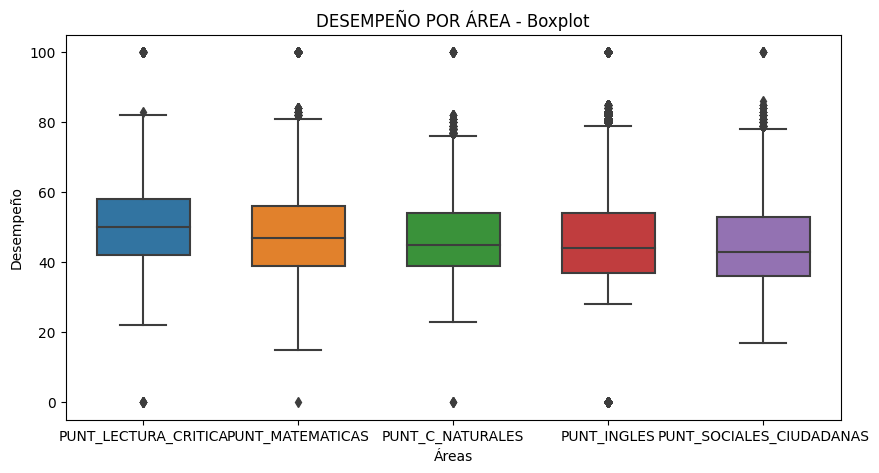

In [ ]:
# Obtención de una lista de índices de las características

def indiceCaracte(df, lstcarac):
  lista_indices = []
  columnas = df.columns
  for i in range(len(columnas)):
    if columnas[i] in lstcarac:
      lista_indices.append(i)
  return lista_indices


lista_desempeño = ['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_INGLES','PUNT_SOCIALES_CIUDADANAS']


### PASOS PARA GRAFICAR ###

plt.figure(figsize = [10,5])

lista = indiceCaracte(df,lista_desempeño)

subset1 = df.iloc[:,lista]

sns.boxplot(data=subset1,orient = 'v',order= lista_desempeño,width=0.6)

plt.xlabel('Áreas')
plt.ylabel('Desempeño')
plt.title("DESEMPEÑO POR ÁREA - Boxplot")
plt.show()

Es posible evidenciar en la gráfica que la presencia de valores atípicos en el desempeño está presente en cada una de las áreas. Estos valores generalmente se acercan a los puntajes 0 y 100, por fuera de los límites de los boxplots y aislados de los demás resultados.

A partir de esta gráfica no es posible establecer con precisión una comparación en el desempeño de dichas áreas. Sin embargo, según la información presentada, se puede concluir que en general el área en la cual se presenta mejor desempeño es Lectura Crítica, ya que su límite inferior (Q1) y límite superior (Q3) de rango intercuartílico están ligeramente más elevados que los de las demás áreas. Asimismo, su mediana se encuentra en un puntaje más elevado que el resto.

<Axes: xlabel='COLE_BILINGUE', ylabel='PUNT_INGLES'>

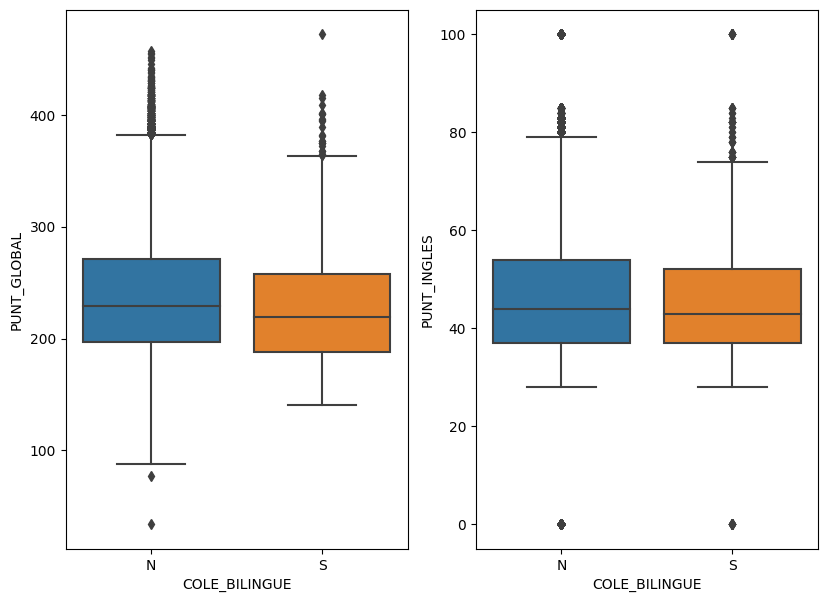

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
sns.boxplot(x = 'COLE_BILINGUE', y = 'PUNT_GLOBAL', data = df)
plt.subplot(1,3,2)
sns.boxplot(x = 'COLE_BILINGUE', y = 'PUNT_INGLES', data = df)

Estas gráficas presentan la información del desempeño de colegios bilingües (S) en contraste con el desempeño de colegios no bilingües (N), tanto en el puntaje global como en la prueba específica de Inglés. Según la información presentada, se observa que la mediana de los puntajes obtenidos en colegios no bilingües es superior en ambos casos al de los colegios bilingües, y sus límites inferiores (Q1) e superiores (Q3) se encuentran en rangos mayores a los mismos. Sin embargo, es posible que en los colegios bilingües haya puntajes perfectos (500 o 100) que no se pueden notar debido a la falta de dimensionalidad de la gráfica.

Se puede concluir, por tanto, que el rendimiento de los colegios no bilingües es en general mejor que el de sus contrapartes bilingües.

<Axes: xlabel='COLE_JORNADA', ylabel='PUNT_GLOBAL'>

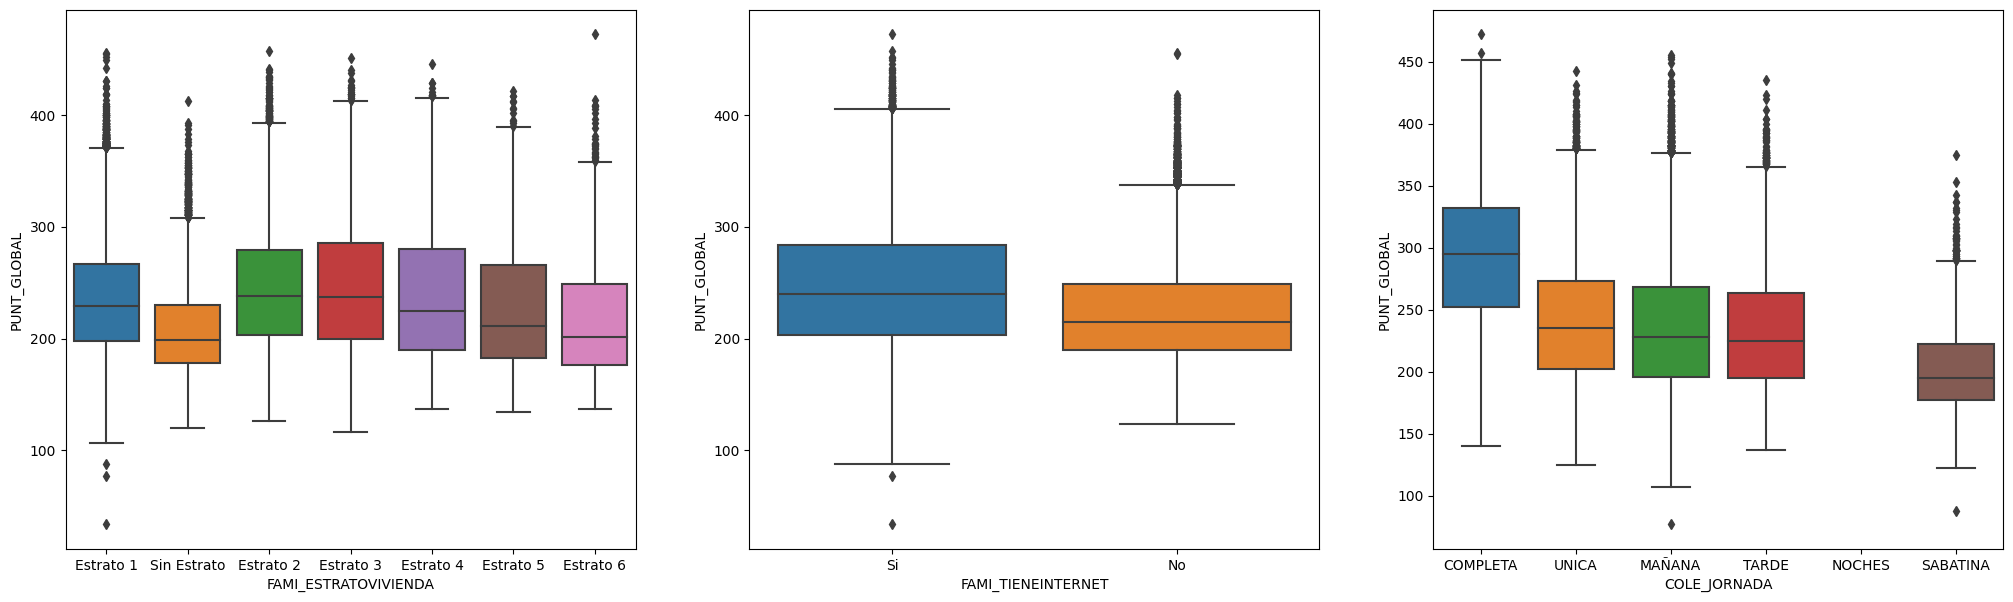

In [ ]:
### GRÁFICAS DE DIVERSAS CARACTERÍSTICAS CATEGÓRICAS CON RESPECTO AL PUNTAJE GLOBAL ###

plt.figure(figsize=(25,7))
plt.subplot(1,3,1)
sns.boxplot(x = 'FAMI_ESTRATOVIVIENDA',y = 'PUNT_GLOBAL',data = df)
plt.subplot(1,3,2)
sns.boxplot(x = 'FAMI_TIENEINTERNET',y = 'PUNT_GLOBAL',data = df)
plt.subplot(1,3,3)
sns.boxplot(x='COLE_JORNADA',y = 'PUNT_GLOBAL',data =df, order = ['COMPLETA',
                                                                  'UNICA',
                                                                  'MAÑANA',
                                                                  'TARDE',
                                                                  'NOCHES',
                                                                  'SABATINA'])


Las gráficas representan el desempeño de los estudiantes en las Pruebas Saber 11° agrupados de acuerdo a su estrato, si cuentan con internet en su hogar y la jornada escolar en la cual estudian, respectivamente.

En la primera gráfica se puede observar que el único grupo que no cuenta con datos atípicos es el Estrato 5. Además, el estrato 6 es el grupo con valores a típicos más cercanos al puntaje máximo (500). Por otro lado, el Estrato 1 cuenta con la mayor cantidad de datos atípicos fuera del límite inferior (Q1), por debajo de 100 puntos en las Pruebas.

De la segunda gráfica es posible concluir que los estudiantes que cuentan con acceso a internet en su hogar generalmente tienen mejor rendimiento que aquellos que no. Esta inferencia se realiza teniendo en cuenta que su mediana es un puntaje superior al del otro grupo, y sus límites inferior (Q1) y superior (Q3) son puntajes más elevados. Además, se observa que los puntajes globales obtenidos por aquellos individuos que sí tienen internet en su casa tienden ligeramente más a 500 que los de aquellos que no; sin embargo, también se encuentran valores atípicos con resultados inferiores a 100 puntos.

Por último, de la tercera gráfica se puede apreciar que los estudiantes de Jornada Completa generalmente tienen mejor rendimiento que sus contrapartes de otras jornadas: la mediana del puntaje global obtenido está significativamente más alta que cualquier otro grupo, los valores de sus límites inferior (Q1) y superior (Q3) son más elevados y, además, se observa una mayor cantidad de puntajes obtenidos cercanos a los 500 puntos. Por otro lado, la Jornada Sabatina tiene peor rendimiento por los aspectos contrarios: la mediana de su puntaje global es significativamente más baja de la de los demás grupos y sus límites superior e inferior tienen valores más bajos que las otras jornadas. Adicionalmente, se observa que en Jornada Única hay valores atípicos cercanos a cero (0) puntos.

# Relaciones entre variables numéricas

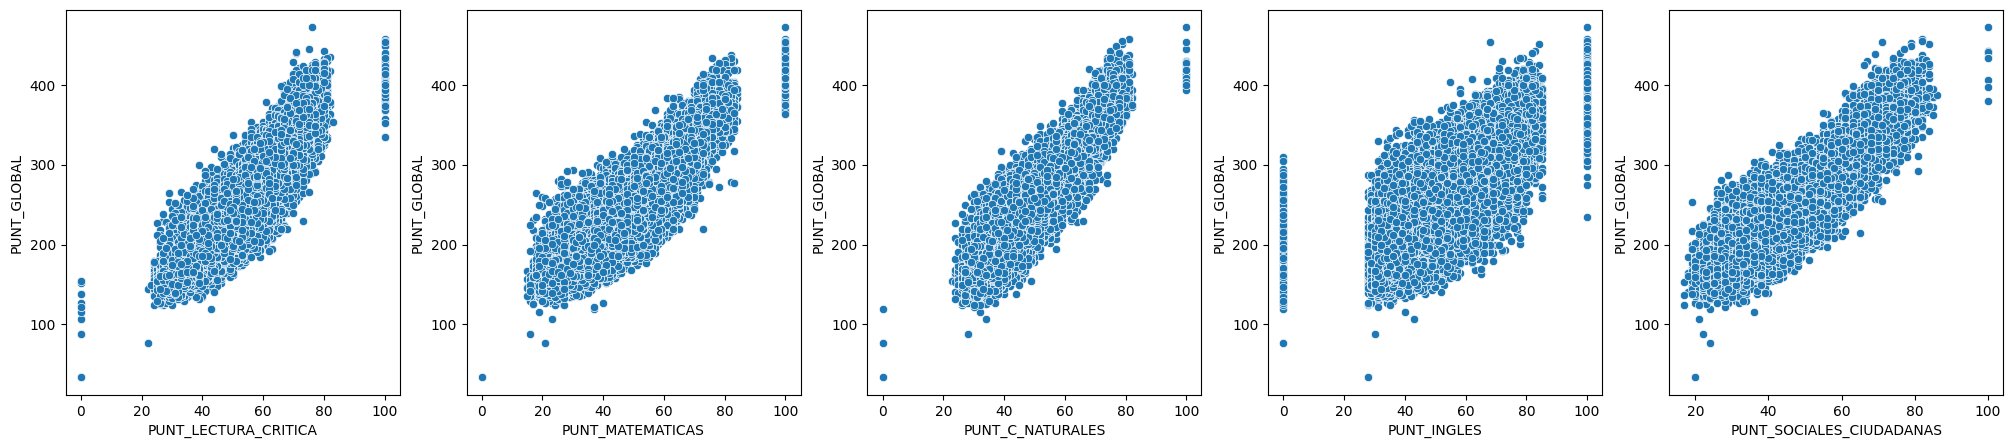

In [ ]:
### REPRESENTACIÓN GRÁFICA DE VARIABLES NUMÉRICAS CON SCATTER PLOTS ###

plt.figure(figsize = (25,5))
for i in range(1,len(lista_desempeño)+1):
  plt.subplot(1,5,i)
  sns.scatterplot(x =lista_desempeño[i-1], y = 'PUNT_GLOBAL',data = df)
plt.show()



En todos los gráficos de dispersión, se observa una correlación positiva entre las puntuaciones de las diferentes áreas (Lectura Crítica, Matemáticas, Ciencias Naturales, Inglés y Sociales Ciudadanas) y el puntaje global. Esto significa que a medida que aumenta la puntuación en cualquiera de estas áreas, también tiende a aumentar el puntaje global. Esto es coherente con la percepción de que un buen desempeño en áreas individuales contribuye a un puntaje global más alto.

Existen discontinuidades (valores atípicos) en las puntuaciones que se extienden desde 0 hasta 20 y desde 80 hasta 100 en los ejes de las puntuaciones individuales. Estas podrían sugerir la presencia de un número significativo de estudiantes que obtuvieron puntuaciones extremadamente bajas, cercanas a 0, o extremadamente altas, cercanas a 100, en estas áreas específicas. Estos fenómenos inusuales pueden atribuirse a la metodología de calificación de las pruebas o a características específicas de la muestra de estudiantes, entre otros.

La identificación de valores atípicos resalta la necesidad de un análisis adicional para comprender las razones detrás de estos resultados inusuales y su impacto en la evaluación.


<Axes: xlabel='ESTU_FECHANACIMIENTO', ylabel='PUNT_GLOBAL'>

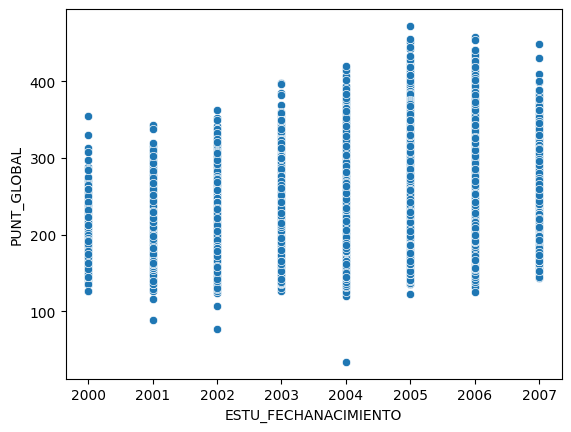

In [ ]:
sns.scatterplot(x = 'ESTU_FECHANACIMIENTO',y = 'PUNT_GLOBAL',data =df)

En la gráfica anterior se puede apreciar que las personas nacidas en 2005 y 2006 tienden a obtener puntajes globales superiores a los estudiantes nacidos en los demás años. Estos puntajes pueden tender a estar elevados debido a que hay mayor concentración de personas en este grupo de edad ya que la moda se encuentra en el año 2005. Por tanto, la probabilidad de que los estudiantes con puntajes mayores se encuentren allí es más alta que en los otros grupos.

# Transformación de variables categóricas.


Gran parte de las variables categóricas son ordinales y tienen un orden preestablecido. Un ejemplo simple en el cual se aprecia el orden es en la variable "Estrato":

    'Sin Estrato'
    'Estrato 1'
    'Estrato 2'
    'Estrato 3'
    'Estrato 4'
    'Estrato 5'
    'Estrato 6'

Para la transformación de las variables del análisis, se hace uso de la técnica Label Encoding u Ordinal Encoding. Se utiliza esta técnica dado que las características categóricas son ordenables, de forma tal que se pueden convertir a variables numéricas respetando su naturaleza ordinal.


In [ ]:
### CODIFICACIÓN DE VARIABLES CATEGÓRICAS A NUMÉRICAS ###

genero_mapping = {
    'F': 1,
    'M': 2,
    pd.NA: pd.NA
}

educacionPadres_mapping = {
    'Primaria incompleta': 1,
    'Primaria completa': 2,
    'Secundaria (Bachillerato) incompleta': 3,
    'Secundaria (Bachillerato) completa': 4,
    'Técnica o tecnológica incompleta': 5,
    'Técnica o tecnológica completa': 6,
    'Educación profesional incompleta': 7,
    'Educación profesional completa': 8,
    'Postgrado': 9,
    'Ninguno': 10,
    'No sabe': 11,
    'No Aplica': 12,
    pd.NA: pd.NA
}

estrato_mapping = {
    'Sin Estrato': 0,
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
    pd.NA: pd.NA
}

personas_hogar_mapping= {
    '1 a 2': 1,
    '3 a 4': 2,
    '5 a 6': 3,
    '7 a 8': 4,
    '9 o más': 5,
    pd.NA: pd.NA
}
cantidad_cuartos_mapping = {
    'Uno': 1,
    'Dos': 2,
    'Tres': 3,
    'Cuatro': 4,
    'Cinco': 5,
    'Seis o mas': 6,
    pd.NA: pd.NA
}
SiNo_mapping = {
    'Si': 1,
    'No': 0,

    pd.NA: pd.NA
}

num_libros_mapping = {
    '0 A 10 LIBROS': 1,
    '11 A 25 LIBROS': 2,
    '26 A 100 LIBROS': 3,
    'MÁS DE 100 LIBROS': 4,
    pd.NA: pd.NA
}

dedicacion_lectura_mapping = {
    '30 minutos o menos': 1,
    'Entre 30 y 60 minutos': 2,
    'Entre 1 y 2 horas': 3,
    'Más de 2 horas': 4,
    'No leo por entretenimiento': 5,
    pd.NA: pd.NA
}


dedicacion_internet_mapping = {
    '30 minutos o menos': 1,
    'Entre 30 y 60 minutos': 2,
    'Entre 1 y 3 horas': 3,
    'Más de 3 horas': 4,
    'No Navega Internet': 5,
    pd.NA: pd.NA
}

horas_trabajo_mapping = {
    '0': 0,
    'Menos de 10 horas': 1,
    'Entre 11 y 20 horas': 2,
    'Entre 21 y 30 horas': 3,
    'Más de 30 horas': 4,
    pd.NA: pd.NA
}


tipo_remuneracion_mapping = {
    'Si, en efectivo': 1,
    'Si, en especie': 2,
    'Si, en efectivo y especie': 3,
    'No': 0,
    pd.NA: pd.NA
}


come_carne_mapping = {
    'Nunca o rara vez comemos eso': 1,
    '1 o 2 veces por semana': 2,
    '3 a 5 veces por semana': 3,
    'Todos o casi todos los días': 4,
    pd.NA: pd.NA
}


situacion_economica_mapping = {
    'Peor': 1,
    'Igual': 2,
    'Mejor': 3,
    pd.NA: pd.NA
}


naturaleza_colegio_mapping = {
    'NO OFICIAL': 0,
    'OFICIAL': 1,
    pd.NA: pd.NA
}


colegio_bilingue_mapping = {
    'N': 0,
    'S': 1,
    pd.NA: pd.NA
}


colegio_caracter_mapping = {
    'ACADÉMICO': 1,
    'TÉCNICO/ACADÉMICO': 2,
    'TÉCNICO': 3,
    'NO APLICA': 4,
    pd.NA: pd.NA
}


ubicacion_colegio_mapping = {
    'URBANO': 1,
    'RURAL': 2,
    pd.NA: pd.NA
}



mapeos = {
    'ESTU_GENERO':genero_mapping,
    'ESTU_TIENEETNIA':SiNo_mapping,
    'FAMI_EDUCACIONPADRE': educacionPadres_mapping,
    'FAMI_EDUCACIONMADRE': educacionPadres_mapping,
    'FAMI_ESTRATOVIVIENDA': estrato_mapping,
    'FAMI_PERSONASHOGAR': personas_hogar_mapping,
    'FAMI_CUARTOSHOGAR': cantidad_cuartos_mapping,
    'FAMI_TIENEINTERNET': SiNo_mapping,
    'FAMI_TIENECOMPUTADOR': SiNo_mapping,
    'FAMI_TIENELAVADORA': SiNo_mapping,
    'FAMI_TIENEHORNOMICROOGAS': SiNo_mapping,
    'FAMI_TIENESERVICIOTV': SiNo_mapping,
    'FAMI_TIENEAUTOMOVIL': SiNo_mapping,
    'FAMI_TIENEMOTOCICLETA': SiNo_mapping,
    'FAMI_TIENECONSOLAVIDEOJUEGOS': SiNo_mapping,
    'FAMI_NUMLIBROS': num_libros_mapping,
    'ESTU_DEDICACIONLECTURADIARIA': dedicacion_lectura_mapping,
    'ESTU_DEDICACIONINTERNET': dedicacion_internet_mapping,
    'ESTU_HORASSEMANATRABAJA': horas_trabajo_mapping,
    'ESTU_TIPOREMUNERACION': tipo_remuneracion_mapping,
    'FAMI_COMECARNEPESCADOHUEVO': come_carne_mapping,
    'FAMI_SITUACIONECONOMICA': situacion_economica_mapping,
    'COLE_NATURALEZA': naturaleza_colegio_mapping,
    'COLE_BILINGUE': colegio_bilingue_mapping,
    'COLE_CARACTER': colegio_caracter_mapping,
    'COLE_AREA_UBICACION': ubicacion_colegio_mapping
}

for columna, mapeo in mapeos.items():
    df[columna] = df[columna].map(mapeo).astype(int)



# Correlación entre variables

El índice de correlación entre dos variables es una medida estadística que cuantifica la relación o asociación entre esas dos variables.

Para calcular el índice de correlación entre las variables numéricas en un conjunto de datos, se puede utilizar la función *corr()* de Pandas. Esto genera una matriz de correlación en la que cada entrada representa el coeficiente de correlación entre dos variables.


<ipython-input-23-e98b32857278>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = df.corr()


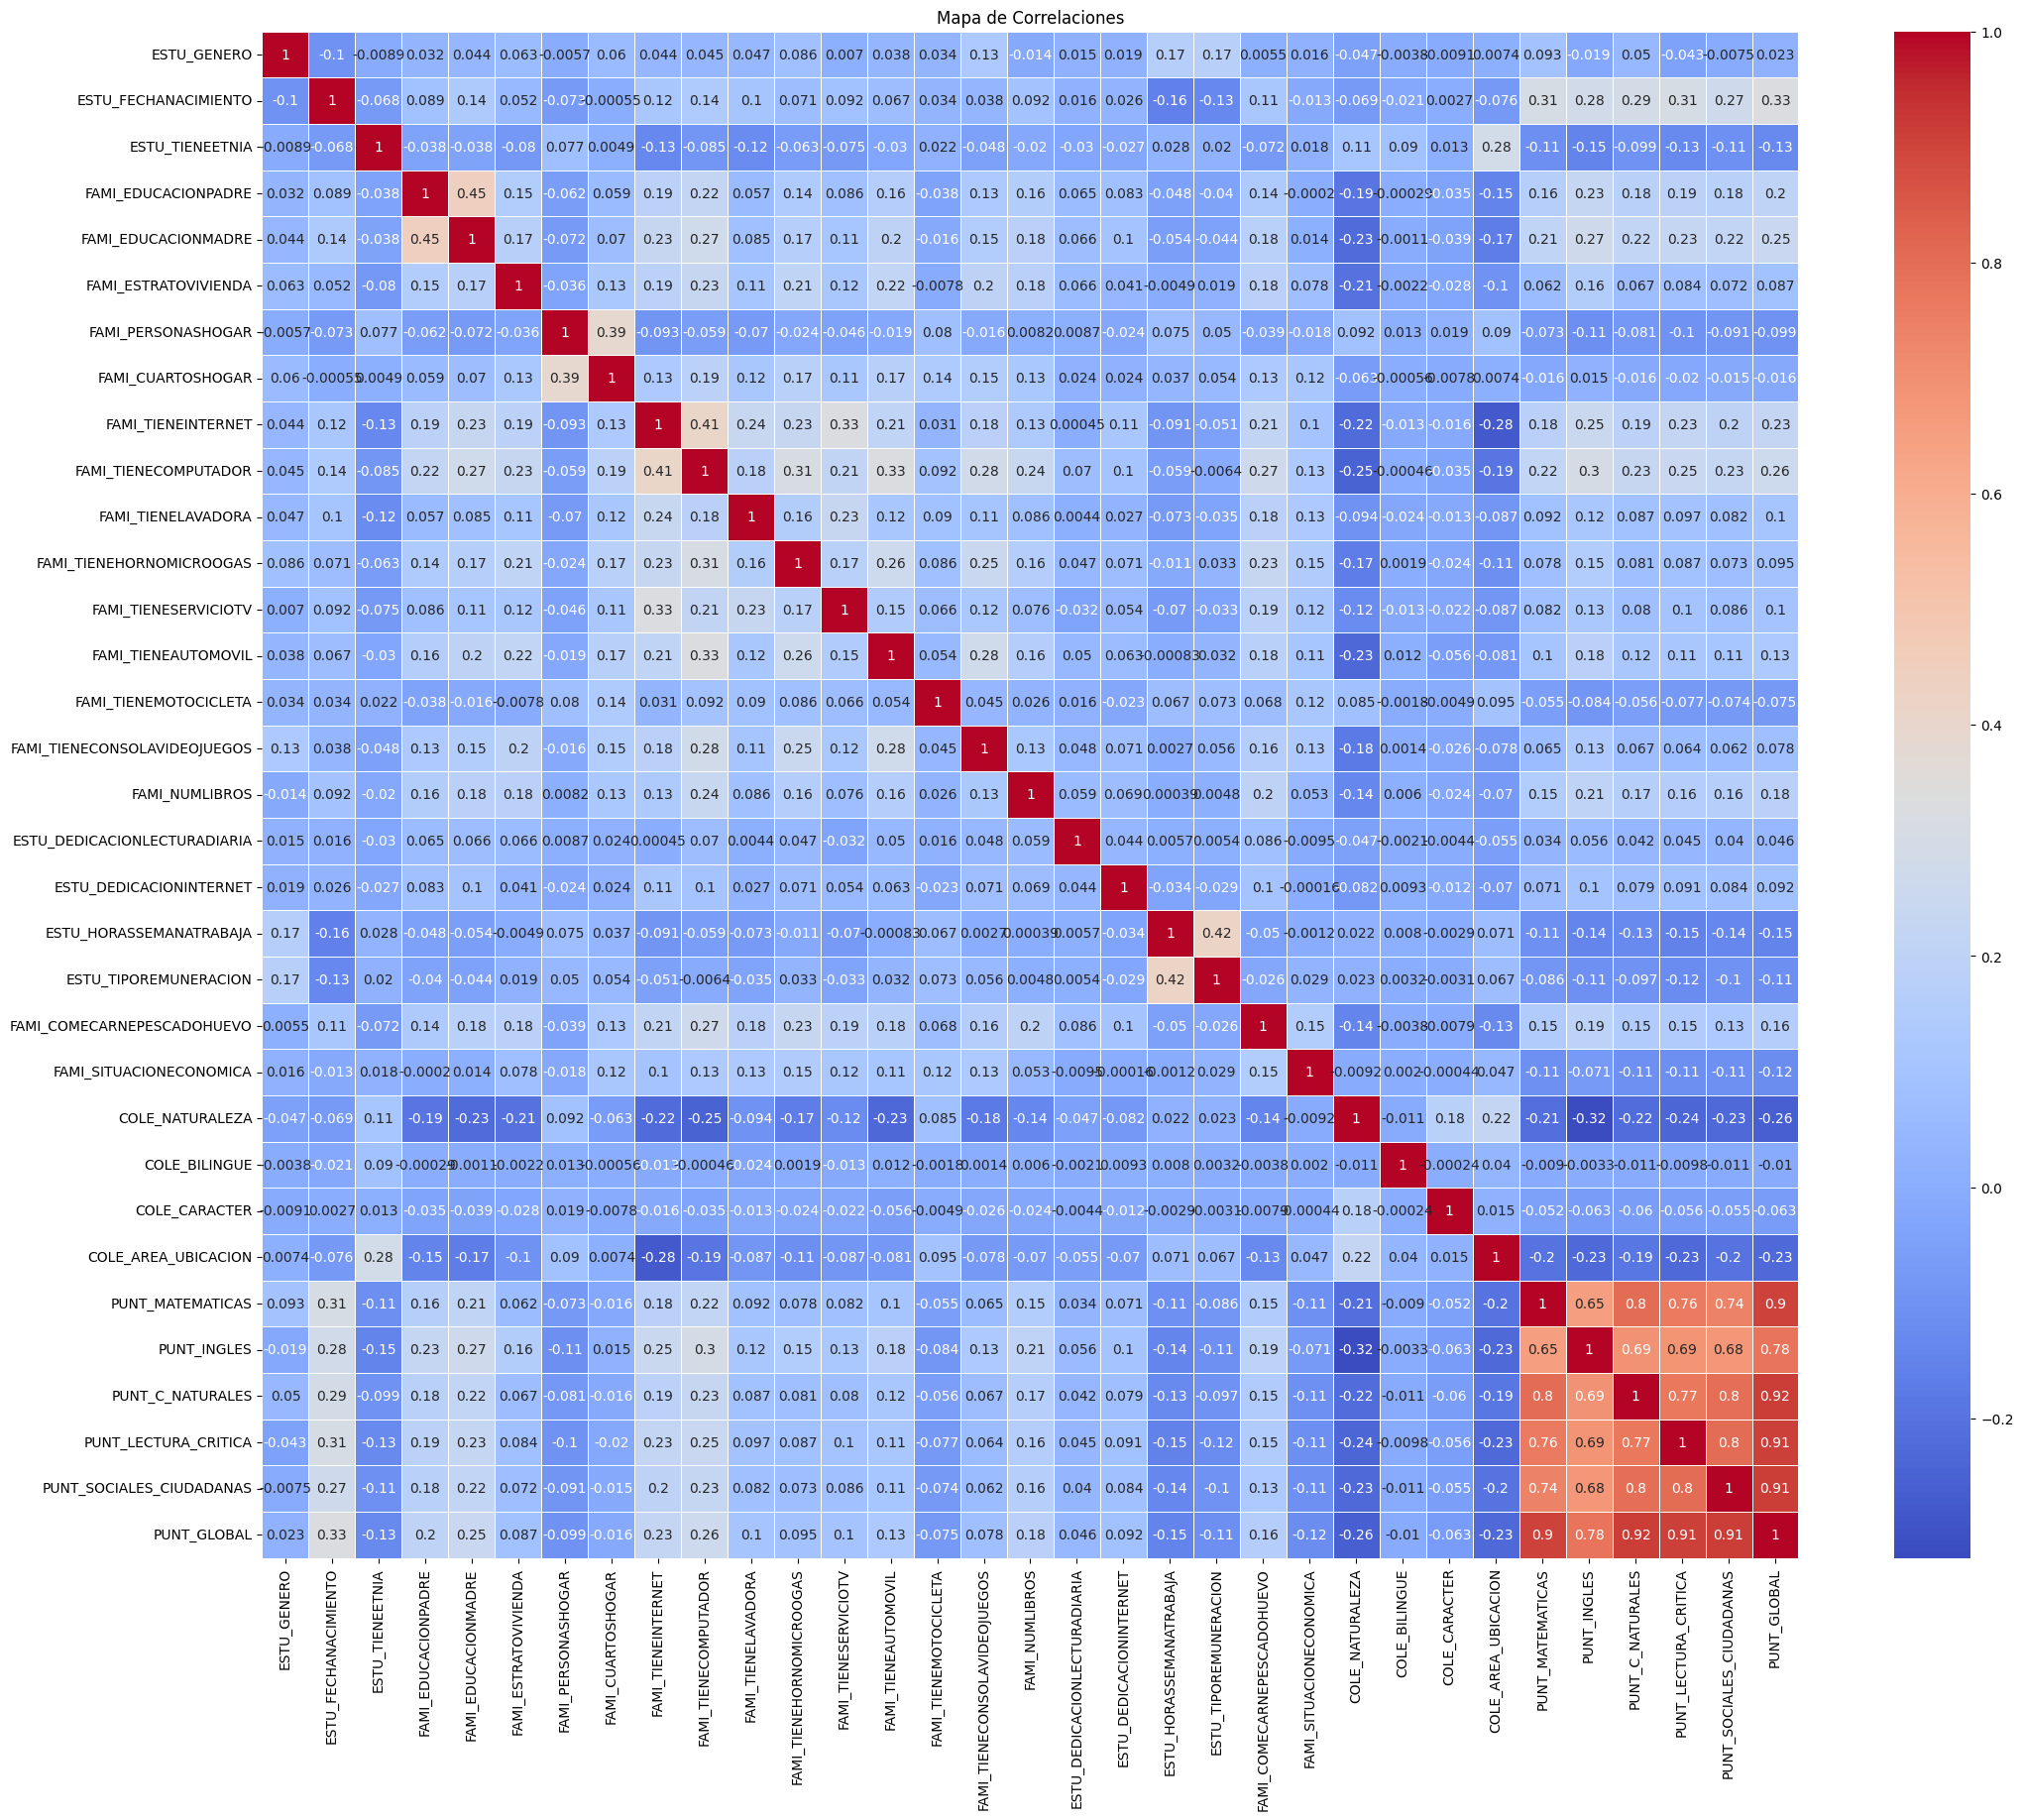

In [ ]:
### MATRIZ DE CORRELACIÓN ###

correlacion = df.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Correlaciones')
plt.show()

Las variables de puntajes por áreas relacionadas con el puntaje global presentan una alta correlación positiva entre ellas. Por el método de cálculo del puntaje global en las pruebas Saber 11, el puntaje individual en las áreas determina el resultado global.

Estas inferencias son congruentes con las conclusiones obtenidas en el punto 5 a partir del análisis de las gráficas *scatterplots*, debido a que en el anterior punto se observaba que el incremento en las áreas individuales significaba también un incremento en el puntaje global, y viceversa. Esto se puede comprobar en la gráfica de la matriz por el alto índice de correlación entre las variables.

Adicionalmente, es importante mencionar que el porcentaje de correlación del área de Inglés es más bajo que el de las demás asignaturas dado que, al momento de realizar la ponderación para el cálculo del puntaje global, su peso asignado (1) es más bajo que el de las demás áreas (3).  

El alto índice de correlación entre estas características indica que son dependientes, por lo cual es factible eliminar las variables de los puntajes por áreas y mantener únicamente el puntaje global.

Dado que solo el puntaje global es relevante para el presente análisis, se eliminan las otras variables "target" que representan el desempeño de los estudiantes en las diferentes áreas.

In [ ]:
caracteristicas_eliminar = ['PUNT_SOCIALES_CIUDADANAS',
                            'PUNT_LECTURA_CRITICA',
                            'PUNT_C_NATURALES',
                            'PUNT_MATEMATICAS',
                            'PUNT_INGLES']
borrarCaracteristicas(df,caracteristicas_eliminar)

# Identificación y Explicación de *Outlers*

## Identificación de valores atípicos de forma univariada empleando representaciones gráficas e interpretaciones de medidas estadísticas

### Representación Gráfica: Boxplots

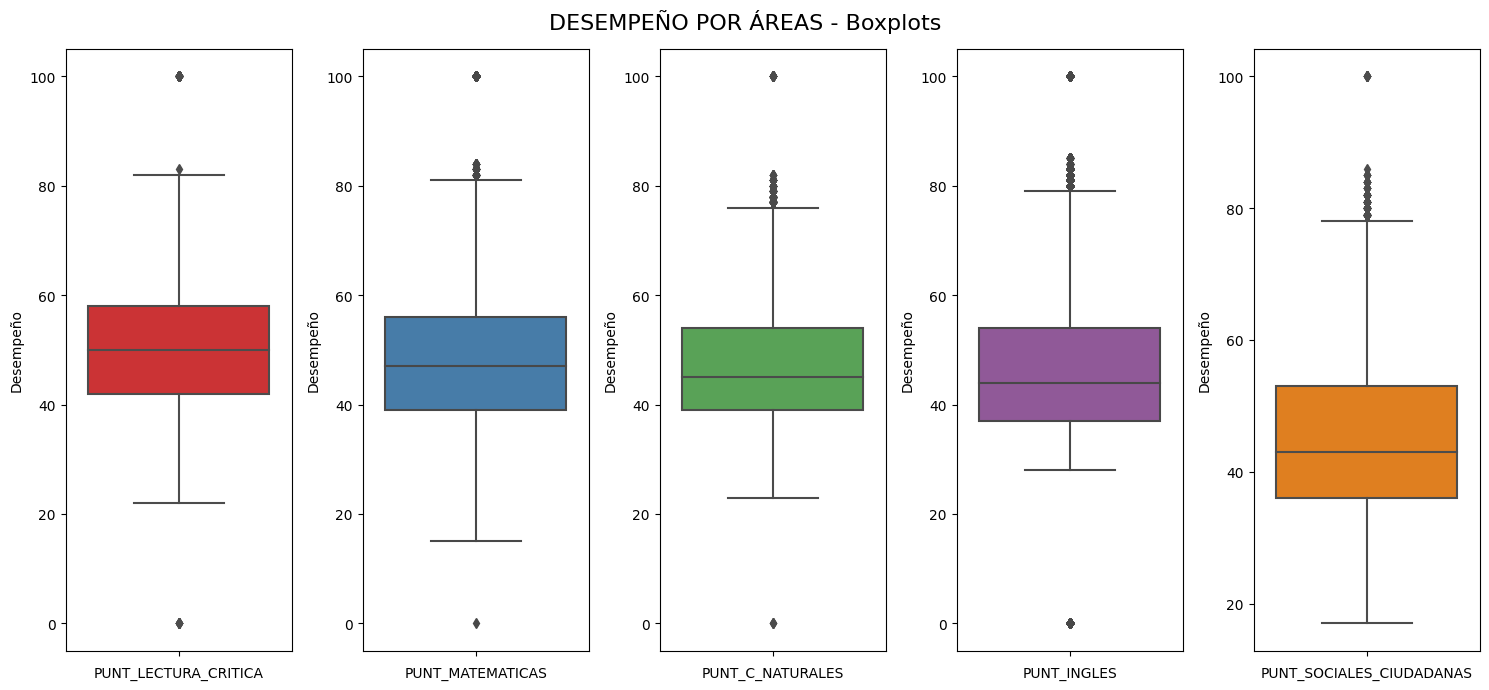

In [ ]:
# Creación de una figura con subplots en una cuadrícula
plt.figure(figsize=(15, 7))
plt.suptitle("DESEMPEÑO POR ÁREAS - Boxplots", fontsize=16)  # Título general para todas las gráficas

# Iteración a través de los elementos de lista_desempeño, y creación de un gráfico de caja para cada uno
for i, data in enumerate(lista_desempeño):
    plt.subplot(1, len(lista_desempeño), i + 1)
    sns.boxplot(data=subset1, y=data, palette=[sns.color_palette("Set1", len(lista_desempeño))[i]])
    plt.xlabel(f"{data}")  # Etiqueta del eje X
    plt.ylabel("Desempeño")  # Etiqueta del eje Y

# Ajuste del espacio entre los subplots
plt.tight_layout()

# Visualización de la figura con los gráficos
plt.show()

Se observa la presencia de datos atípicos en todas las áreas evaluadas por la Prueba, que son aquellos que se encuentran aislados y fuera de los límites superiores e inferiores de los boxplots. Estos están, en casi las áreas, llegando a los 100 y 0 puntos de calificación, respectivamente.



## Gráficos Q-Q (Quantile-Quantile)

La interpretación de los gráficos Q-Q (Quantile-Quantile) es fundamental para comprender cómo se distribuyen los datos en comparación con una distribución teórica, como la distribución normal estándar (con una media de 0 y una desviación estándar de 1), que se representa mediante una línea recta en el gráfico Q-Q.

Cada punto en el gráfico Q-Q representa una observación de nuestros datos. Estos puntos muestran cómo se comparan las observaciones reales con los cuantiles teóricos de la distribución de referencia. Si los datos siguen una distribución normal, los puntos en el gráfico deberían seguir la línea diagonal de referencia. Esto significa que los datos se ajustan bien a la distribución normal y no hay desviaciones significativas.
Estos gráficos son útiles para identificar valores atípicos o desviaciones de la normalidad en los datos.


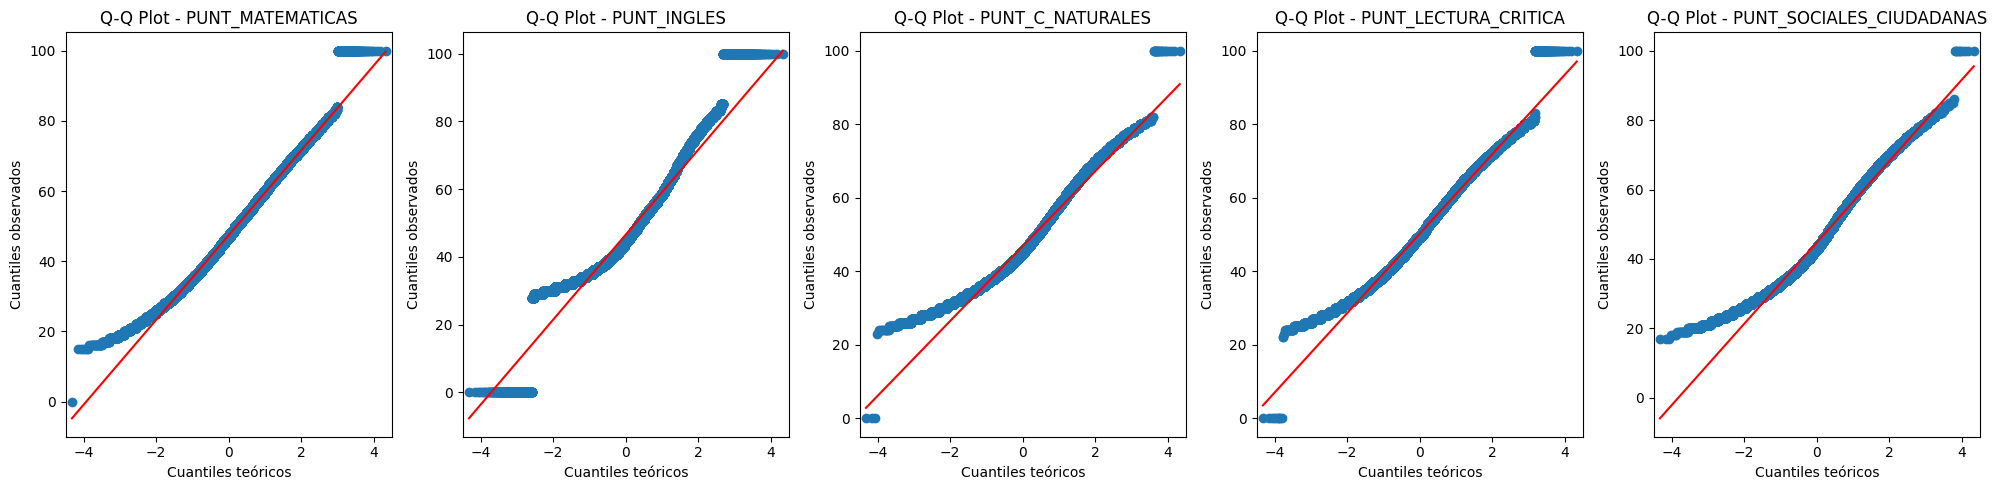

In [ ]:
import statsmodels.api as sm
# Creación de una figura con subplots para cada área
fig, axs = plt.subplots(1, len(subset1.columns), figsize=(20, 5))

# Iteración a través de las columnas (áreas) de subset1 y creación de un Q-Q plot para cada una
for i, area in enumerate(subset1.columns):
    sm.qqplot(subset1[area], line='s', ax=axs[i])
    axs[i].set_title(f'Q-Q Plot - {area}')
    axs[i].set_xlabel('Cuantiles teóricos')
    axs[i].set_ylabel('Cuantiles observados')

# Ajuste del espacio entre los subplots
plt.tight_layout()

# Visualización de la figura con los gráficos
plt.show()

Como se puede observar en los gráficos Q-Q, existen valores atípicos, los cuales se pueden visualizarse como desviaciones significativas de la línea diagonal. Estos están lejos de la línea diagonal, especialmente en los extremos del gráfico, lo cual sugiere la presencia de valores atípicos en los datos.

## Medida Estadística: Cálculo del rango intercuartílico (IQR)



1.   Se calculan los cuartiles Q1 y Q3 del conjunto de datos. Estos cuartiles dividen los datos en cuatro partes iguales, donde Q1 representa el 25% de los datos más bajos y Q3 representa el 75% de los datos más bajos.
2.   Se calcula el rango intercuartílico (IQR) como la diferencia entre Q3 y Q1. El IQR es una medida de la dispersión en los datos y se utiliza para determinar cuán amplia es la "caja" en un boxplot.
3.   Se definen los límites inferior y superior para identificar valores atípicos.

  Límite Inferior = Q1 - 1.5 * IQR

  Límite Superior = Q3 + 1.5 * IQR



In [ ]:
# Cálculo de los cuartiles Q1 y Q3 del conjunto de datos
Q1 = subset1.quantile(0.25)  # Cuartil 1 (25%)
Q3 = subset1.quantile(0.75)  # Cuartil 3 (75%)
IQR = Q3 - Q1  # Se calcula el rango intercuartílico (IQR)

# Definición de los límites inferior y superior para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR  # Límite Inferior
upper_bound = Q3 + 1.5 * IQR  # Límite Superior

# Creación de una máscara booleana llamada "outliers1" que identifica las observaciones atípicas
outliers1 = (subset1 < lower_bound) | (subset1 > upper_bound)

# Contar cuántos valores atípicos hay en cada área
num_outliers_by_area = outliers1.sum()

print("Número de valores atípicos por área:")
print(num_outliers_by_area)

total_outliers = num_outliers_by_area.sum()

print("Suma total de valores atípicos en todas las áreas:", total_outliers)

Número de valores atípicos por área:
PUNT_MATEMATICAS             293
PUNT_INGLES                 2293
PUNT_C_NATURALES             361
PUNT_LECTURA_CRITICA         108
PUNT_SOCIALES_CIUDADANAS     228
dtype: int64
Suma total de valores atípicos en todas las áreas: 3283


Los valores "true" en la máscara "outliers" representan las observaciones que se consideran atípicas en los puntajes por áreas. Estos valores atípicos son aquellos que caen fuera de los límites establecidos por el método del rango intercuartílico (IQR)



---



Pueden existir varias posibles explicaciones para la presencia de estos datos atípicos (3283):
El método de calificación de las Pruebas puede admitir o requerir la aproximación de los resultados en caso de puntuaciones superiores a 90 e inferiores a 10, rango en el cual se encuentran todos los valores atípicos en el desempeño por áreas. Es importante resaltar que la mayor parte de estos datos se encuentran en el área de Inglés (2293).

## Identificación de valores atípicos de forma multivariada empleando una función de scikit-learn

In [ ]:
from sklearn.ensemble import IsolationForest

# Crear un modelo Isolation Forest
clf = IsolationForest(n_estimators=20, warm_start=True, contamination=0.021)
clf.fit(subset1) # Ajustar el modelo
outliers = clf.predict(subset1) # Predecir los valores atípicos

num_outliers = len(outliers[outliers == -1])

print("Número total de valores atípicos:", num_outliers)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Número total de valores atípicos: 2684


Los valores atípicos detectados de forma univariada aparentemente no cambian en gran medida al aplicar un análisis multivariado. Por tanto, con la función usada de scikit-learn a partir de la creación de un modelo Isolation Forest la suma total de valores atípicos encontrados es muy cercana al número total encontrado de valores atípicos en el análisis univariado.

##Eliminación adicional de algunas columnas

In [ ]:
caracteristicas_eliminar = ['ESTU_NACIONALIDAD',
                            'ESTU_PAIS_RESIDE',
                            'ESTU_DEPTO_RESIDE',
                            'ESTU_MCPIO_RESIDE',
                            'COLE_JORNADA']
borrarCaracteristicas(df,caracteristicas_eliminar)

# Criterios de Selección de Características**

## **Filtros**

Para los criterios de selección de características, se escogieron: `chi2,` `f_classif` y `mutual_info_classif`.

- `chi2` mide la dependencia de una característica con cada una de las clases, haciendo uso del estadístico chi-cuadrado.

- `f_classif`, también conocido como ANOVA, permite cuantificar la diferencia entre los valores medios de cada característica en diferentes clases.
- `mutual_info_classif` mide la dependencia o la información mutua entre una característica y la variable objetivo (que puede ser categórica o numérica).



Cuadernillo guía del profesor:
https://colab.research.google.com/drive/16l03-XBtMk89od6eRAobXksXELf7Iy-X#scrollTo=J8nJ-gm1Y49-

In [ ]:
# Importar los métodos que se aplicarán para calcular cuáles son las características más relevantes
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Importar train_test_split el cual permite dividir la base de datos en datos de prueba y entrenamiento
from sklearn.model_selection import train_test_split

In [ ]:
# Se obtiene una muestra de 10000 datos
df2 = df.copy().sample(50000)

# Se obtienen todas las variables menos la última columna
X = df2.iloc[:,:-1]

# Se obtiene la última columna que pertenece al target
y = df2.iloc[:,-1]

In [ ]:
# Se guardan en un diccionario los métodos de selección de características
medidas = {'chi2':chi2,
           'f_classif':f_classif,
           'mutual_info_classif':mutual_info_classif}

In [ ]:
# Se crea un dataFrame que contendrá los puntajes para cada una de las características
puntajes = pd.DataFrame()
for clave, valor in medidas.items():

  selector = SelectKBest(valor).fit(X, y)
  # Se obtienen los puntajes de características después de aplicar SelectKBest
  scores = selector.scores_
  X_new = selector.fit_transform(X,y)
  # Se guardan los puntajes en el DataFRame
  puntajes[clave] = scores


Text(0, 0.5, 'Score')

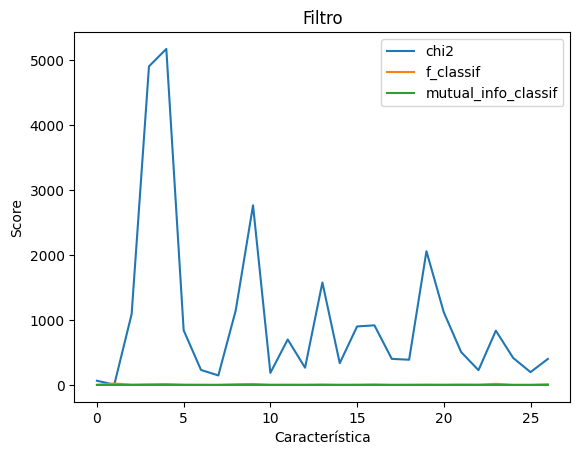

In [ ]:
plt.title('Filtro')
for clave, valor in medidas.items():

  sns.lineplot(data = puntajes, y = clave ,x= [i for i in range(len(puntajes))],label = clave)
plt.xlabel("Característica")
plt.ylabel("Score")

Se observa que mutual_info_classif se encuentra entre cero (0) y uno (1) por lo tanto se debe graficar por aparte

Text(0, 0.5, 'Score')

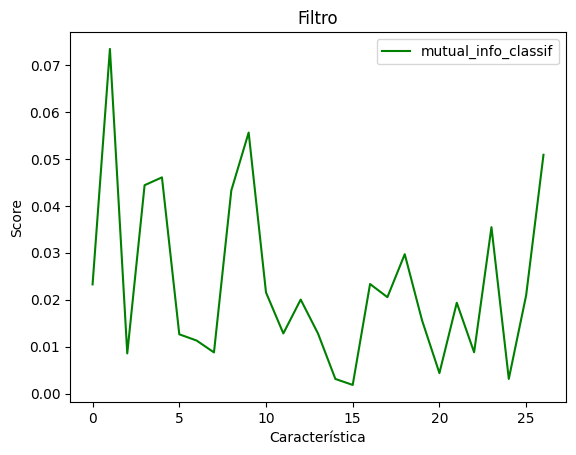

In [ ]:
plt.title('Filtro')

sns.lineplot(data = puntajes, y = clave ,x= [i for i in range(len(puntajes))],label = clave,color = 'green')
plt.xlabel("Característica")
plt.ylabel("Score")

In [ ]:
df

,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,...,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,FAMI_COMECARNEPESCADOHUEVO,FAMI_SITUACIONECONOMICA,COLE_NATURALEZA,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,PUNT_GLOBAL
42,2,2002,1,4,4,1,2,2,1,0,...,3,0,0,2,2,1,0,4,2,144
43,1,2005,1,3,3,0,2,3,0,0,...,1,1,1,4,3,1,0,3,2,149
45,1,2001,1,3,4,1,4,4,1,1,...,3,2,1,2,2,1,0,3,2,142
46,1,2004,1,4,4,1,2,2,1,0,...,3,0,0,2,2,1,0,1,2,151
47,1,2004,1,1,1,1,4,1,0,0,...,2,0,0,2,3,1,0,1,1,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532787,1,2006,0,1,10,1,1,1,0,0,...,1,0,0,2,2,1,0,2,1,200
532788,1,2006,1,4,4,1,2,3,0,0,...,2,0,0,1,3,1,0,2,1,243
532789,1,2005,0,10,1,3,3,3,0,0,...,1,0,0,3,3,1,0,1,2,229
532790,2,2004,0,11,11,3,2,3,1,1,...,4,0,1,4,2,0,0,1,1,304


La siguiente tabla sintetiza los resultados obtenidos de los diferentes criterios de selección de características, con la estrategia Filtro. En esta tabla se pueden ver todas las variables no target (27) de la base de datos, representadas por su índice en la tabla. Además, se pueden observar los puntajes obtenidos por cada una de estas variables con los diferentes criterios: `chi2,` `f_classif` y `mutual_info_classif`.

In [ ]:
puntajes

,chi2,f_classif,mutual_info_classif
0,64.368514,1.243393,0.023265
1,3.895363,21.794022,0.073457
2,1089.751882,4.051328,0.008549
3,4899.627830,9.818235,0.044408
4,5168.125882,13.312647,0.046074
5,840.225993,3.732578,0.012621
6,230.023395,2.462489,0.011290
7,145.931729,1.436094,0.008762
8,1143.932550,10.058368,0.043289
9,2762.402872,14.819157,0.055631


Teniendo los puntajes de las características para la estrategias aplicada (Filtros), se procede a encontrar las 5 características con mejor rendimiento.

In [ ]:
top_5_elementos_chi2 = list(puntajes['chi2'].nlargest(5, keep='all').index)
top_5_elementos_fclassif = list(puntajes['f_classif'].nlargest(5, keep='all').index)
top_5_elementos_mutual_info_classif =list(puntajes['mutual_info_classif'].nlargest(5, keep='all').index)

In [ ]:
def mostrarCaracteristicas(df,listaindices):
  lista_carac = list(df.columns[listaindices])
  for i in lista_carac:
    print(i,end=",")
  print()

In [ ]:

print("%30s"%('Top 5 puntajes por estrategia aplicada'))
print("%30s"%('FILTRO'))
print("%30s:  CARACTERÍSTICA"%("ESTRATEGIA #1"))
print("%30s:  "%("chi2"),end="")
mostrarCaracteristicas(df,top_5_elementos_chi2)
print("%30s:  "%("f_classif"),end="")
mostrarCaracteristicas(df,top_5_elementos_fclassif)
print("%30s:  "%('mutual_info_classif'),end="")
mostrarCaracteristicas(df,top_5_elementos_mutual_info_classif)

Top 5 puntajes por estrategia aplicada
                        FILTRO
                 ESTRATEGIA #1:  CARACTERÍSTICA
                          chi2:  FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_TIENECOMPUTADOR,ESTU_HORASSEMANATRABAJA,FAMI_TIENEAUTOMOVIL,
                     f_classif:  ESTU_FECHANACIMIENTO,COLE_NATURALEZA,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,
           mutual_info_classif:  ESTU_FECHANACIMIENTO,FAMI_TIENECOMPUTADOR,COLE_AREA_UBICACION,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,


Es primordial mencionar que cada que se ejecuta el código se obtienen resultados ligeramente diferentes. Sin embargo, en general los resultados son divergentes en una o dos variables.

Para la estrategia de Filtro, generalmente se encuentran en el top 5 en todos los 3 criterios de selección las siguientes variables: Educación de la Madre, Fecha de Nacimiento, Si la Familia Posee Computador, Si la Familia Posee Internet y la Educación del Padre.

A partir de los resultados obtenidos se infiere también que aquellas características relacionadas al Internet y Nivel Educativo de los Padres tienen un papel relevante también.

--------

# SELECCIÓN DE CARACTERÍSTICAS PARA LA IMPLEMENTACIÓN DE LA REGRESIÓN:


Se seleccionan las características más relevantes para la implementación de la regresión, según los resultados obtenidos con el método de Filtro para los criterios `chi2,` `f_classif` y `mutual_info_classif`.

Las características más relevantes son:

- Fecha de Nacimiento
- Familia Posee Computador
- Familia Posee Internet
- Nivel Educativo de la Madre
- Nivel Educativo de la Padre
- Horas de trabajo semanal
- Número de libros
- Colegio Bilingüe

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


df_data = df.copy()
df_data

,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,...,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,FAMI_COMECARNEPESCADOHUEVO,FAMI_SITUACIONECONOMICA,COLE_NATURALEZA,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,PUNT_GLOBAL
42,2,2002,1,4,4,1,2,2,1,0,...,3,0,0,2,2,1,0,4,2,144
43,1,2005,1,3,3,0,2,3,0,0,...,1,1,1,4,3,1,0,3,2,149
45,1,2001,1,3,4,1,4,4,1,1,...,3,2,1,2,2,1,0,3,2,142
46,1,2004,1,4,4,1,2,2,1,0,...,3,0,0,2,2,1,0,1,2,151
47,1,2004,1,1,1,1,4,1,0,0,...,2,0,0,2,3,1,0,1,1,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532787,1,2006,0,1,10,1,1,1,0,0,...,1,0,0,2,2,1,0,2,1,200
532788,1,2006,1,4,4,1,2,3,0,0,...,2,0,0,1,3,1,0,2,1,243
532789,1,2005,0,10,1,3,3,3,0,0,...,1,0,0,3,3,1,0,1,2,229
532790,2,2004,0,11,11,3,2,3,1,1,...,4,0,1,4,2,0,0,1,1,304


Nuevo dataframe con las caracterisiticas más relevantes:

In [ ]:
selected_features = ['ESTU_FECHANACIMIENTO', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 'ESTU_HORASSEMANATRABAJA', 'FAMI_NUMLIBROS', 'COLE_BILINGUE','PUNT_GLOBAL']
df_selected = df_data[selected_features]
df_selected

,ESTU_FECHANACIMIENTO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,ESTU_HORASSEMANATRABAJA,FAMI_NUMLIBROS,COLE_BILINGUE,PUNT_GLOBAL
42,2002,0,1,4,4,0,1,0,144
43,2005,0,0,3,3,1,1,0,149
45,2001,1,1,4,3,2,1,0,142
46,2004,0,1,4,4,0,1,0,151
47,2004,0,0,1,1,0,2,0,149
...,...,...,...,...,...,...,...,...,...
532787,2006,0,0,10,1,0,2,0,200
532788,2006,0,0,4,4,0,3,0,243
532789,2005,0,0,1,10,0,1,0,229
532790,2004,1,1,11,11,0,1,0,304


Se procede a verificar la cantidad de valores nulos (o NaN) en cada columna del DataFrame "*df_selected*". La salida de este código proporciona una visión general de la presencia de *datos faltantes* en el conjunto de datos.

In [ ]:
df_selected.isnull().sum()

ESTU_FECHANACIMIENTO       0
FAMI_TIENECOMPUTADOR       0
FAMI_TIENEINTERNET         0
FAMI_EDUCACIONMADRE        0
FAMI_EDUCACIONPADRE        0
ESTU_HORASSEMANATRABAJA    0
FAMI_NUMLIBROS             0
COLE_BILINGUE              0
PUNT_GLOBAL                0
dtype: int64

Se preparan los datos para modelos de Machine Learning, donde se separa la variable objetivo de las variables predictoras. En este caso, **X** contendría las características que se utilizarán para predecir **'PUNT_GLOBAL'** en un modelo de regresión o cualquier otro modelo de aprendizaje supervisado.

Se crea **'X'**, la cual es un subconjunto de *df_selected* que incluye todas las características (variables independientes) excepto la variable objetivo **'PUNT_GLOBAL'**.

In [ ]:
X = df_selected.drop('PUNT_GLOBAL', axis=1)
X

,ESTU_FECHANACIMIENTO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,ESTU_HORASSEMANATRABAJA,FAMI_NUMLIBROS,COLE_BILINGUE
42,2002,0,1,4,4,0,1,0
43,2005,0,0,3,3,1,1,0
45,2001,1,1,4,3,2,1,0
46,2004,0,1,4,4,0,1,0
47,2004,0,0,1,1,0,2,0
...,...,...,...,...,...,...,...,...
532787,2006,0,0,10,1,0,2,0
532788,2006,0,0,4,4,0,3,0
532789,2005,0,0,1,10,0,1,0
532790,2004,1,1,11,11,0,1,0


**'y'** representa la variable que queremos *predecir*. En este caso, **'PUNT_GLOBAL'** es el puntaje global en las pruebas SABER 11, en el cual se
procura crear un modelo capaz de predecir el puntaje global basado en características socioeconómicas de un estudiante.

In [ ]:
y = df_selected['PUNT_GLOBAL']
y

42        144
43        149
45        142
46        151
47        149
         ... 
532787    200
532788    243
532789    229
532790    304
532791    228
Name: PUNT_GLOBAL, Length: 127787, dtype: int64

Se realiza una división de los datos (**X** e **y**) en conjuntos de entrenamiento y prueba utilizando la función `train_test_split` de `scikit-learn`.

 Luego, se crea un modelo de aprendizaje supervisado (regresión lineal, regresión polinómica, árbol de decisión, bosques aleatorios) y se entrena con los datos seleccionados para esto.

## Regresión Lineal

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crea un modelo de Regresión Lineal
model_lineal = LinearRegression()
model_lineal.fit(X_train, y_train)

LinearRegression()

## Regresión Polinómica

In [ ]:
# Crea un modelo de Regresión Polinómica
degree = 2  # Grado del polinomio
model_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_poly.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

## Árboles de Decisión

In [ ]:
# Crea un modelo de Árbol de Decisión
model_tree = DecisionTreeRegressor()
model_tree.fit(X, y)

DecisionTreeRegressor()

## Bosques Aleatorios

In [ ]:
# Crea un modelo de Bosque Aleatorio
model_rf = RandomForestRegressor()
model_rf.fit(X, y)

RandomForestRegressor()

## Gráficas y Evaluación de los modelos

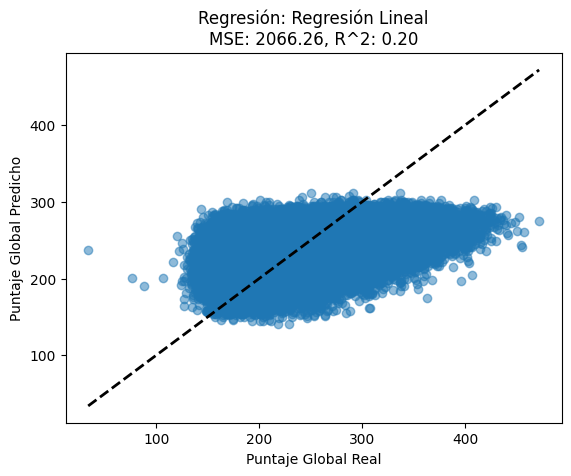

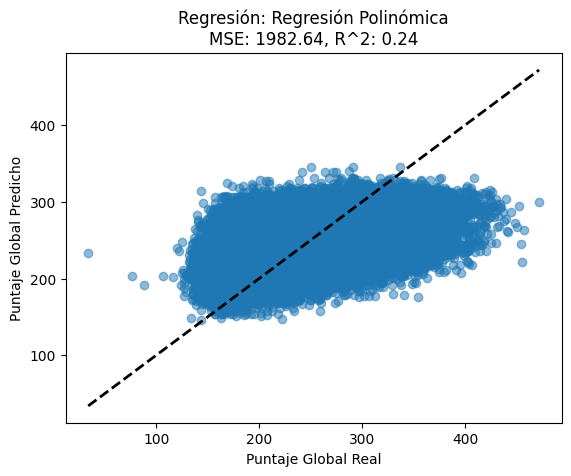

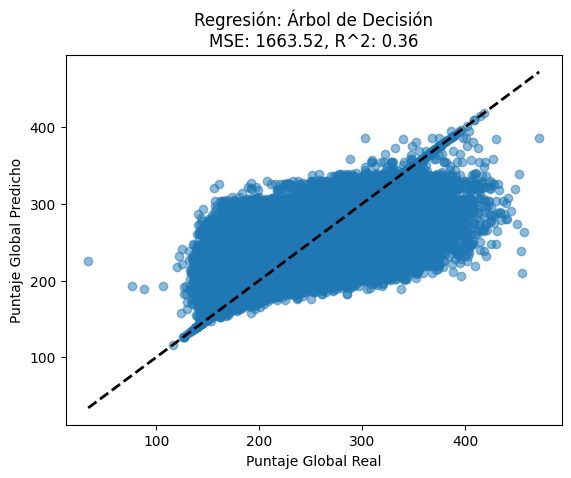

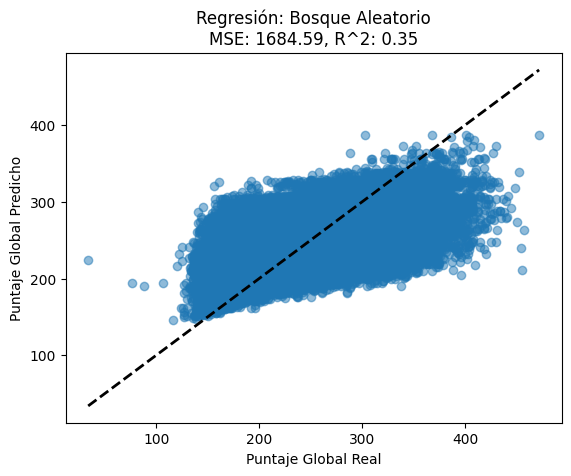

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Función para evaluar y graficar un modelo
def evaluate_and_plot(model, X, y, model_name):
    # Predicciones
    y_pred = model.predict(X)

    # Métricas de evaluación
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Graficar resultados
    plt.scatter(y, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k', linewidth=2)
    plt.title(f'Regresión: {model_name}\nMSE: {mse:.2f}, R^2: {r2:.2f}')
    plt.xlabel('Puntaje Global Real')
    plt.ylabel('Puntaje Global Predicho')
    plt.show()

# Evaluar y graficar modelos
evaluate_and_plot(model_lineal, X, y, 'Regresión Lineal')
evaluate_and_plot(model_poly, X, y, 'Regresión Polinómica')
evaluate_and_plot(model_tree, X, y, 'Árbol de Decisión')
evaluate_and_plot(model_rf, X, y, 'Bosque Aleatorio')

# Conclusiones

Con base en los resultados observados para cada uno de los modelos de aprendizaje supervisado, es posible inferir las siguientes conclusiones:

1.	**Correlación Moderada:**
*	Existe una correlación moderada entre los factores socioeconómicos y el rendimiento académico. Esto indica que hay alguna relación, pero no es extremadamente fuerte.

* Esta falta de correlación se podría explicar debido a que las respuestas del cuestionario no son completamente fiables, ya que algunos estudiantes tienen poca responsabilidad y honestidad al momento de responder la encuesta.


2.	**Limitaciones en la Explicación del Rendimiento Académico:**
*	Aunque hay una correlación moderada, los factores socioeconómicos no explican completamente o no son suficientemente fuertes o específicos para predecir el rendimiento académico de un estudiante en las Pruebas Saber 11°.
*	Esto puede sugerir que otros factores, no considerados en el modelo actual, podrían tener una influencia significativa en el rendimiento estudiantil.

3.	**Influencia Limitada de los Factores Socioeconómicos del ICFES:**
*	No se puede concluir que los factores socioeconómicos registrados por el ICFES realmente influyan de manera significativa en los puntajes de los estudiantes durante las pruebas.
*	Esto plantea la posibilidad de que los factores recopilados por el ICFES podrían no capturar completamente la complejidad de los determinantes del rendimiento.

# Trabajos Futuros


**Recomendaciones para Investigaciones Futuras:**
*	Se sugiere explorar e incluir variables adicionales que podrían tener un impacto significativo en el rendimiento en las Pruebas. Por ejemplo, la inclusión del desempeño académico previo, como las notas obtenidas durante la secundaria, podría mejorar la capacidad predictiva del modelo. Además, agregar también una variable que sea "calidad del entorno educativo" y un cuantificador para medir la calidad del profesorado.

*	La participación en actividades extracurriculares también podría ser un factor relevante que influya en el desarrollo integral de los estudiantes y, por ende, en su rendimiento académico.

> **Análisis Temporal:**
*	Realizar un análisis temporal para entender cómo los factores socioeconómicos y el rendimiento académico han evolucionado con el tiempo. Esto podría revelar tendencias a lo largo de diferentes periodos académicos.

> **Manejo de datos Geo-referenciados:**
*	Realizar un análisis geográfico para entender cómo las ubicaciones geográficas específicas en la Región Colombiana pueden influir en el rendimiento académico.


